# Testing whole workflow for return problem

In [1]:
import numpy as np
import numpy.linalg as la
import pykep as pk
from pykep.planet import jpl_lp
from pykep import epoch
import pygmo as pg
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os
import spiceypy as spice

%matplotlib notebook

%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")
import pyxplorer as pxp

In [3]:
sys.path.append("../runs")
from run_interplanetary_return import run_optim_return

In [4]:
# get algorithm
algo = pg.algorithm(pg.sade(gen=2000))

In [5]:
seq_key = ["saturn", "mars", "earth"]
pop_list, prob_list = run_optim_return(seq_key, algo)

scanning launch window:   0%|          | 0/12 [00:00<?, ?it/s]

In [6]:
# get combined list of xs and fs
for idx,pop_iter in enumerate(pop_list):
    if idx == 0:
        x_combined = pop_iter.get_x()
        f_combined = pop_iter.get_f()
    else:
        x_combined = np.concatenate((x_combined, pop_iter.get_x()),axis=0)
        f_combined = np.concatenate((f_combined, pop_iter.get_f()))

In [7]:
xbest = x_combined[np.argmin(f_combined),:]

<IPython.core.display.Javascript object>


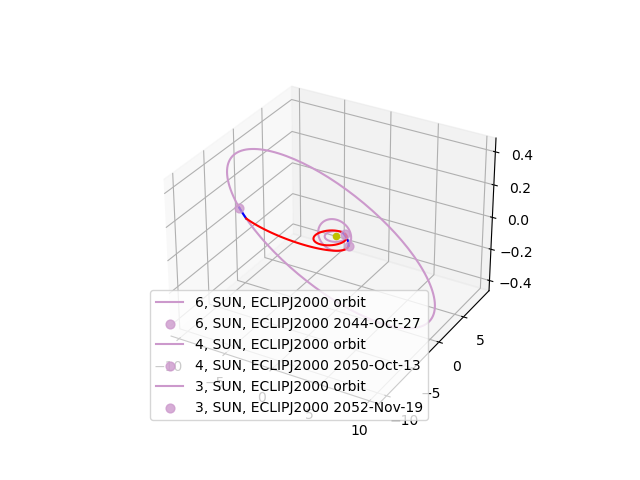

In [8]:
ax = prob_list[0].plot(xbest)

In [9]:
len(x_combined[0])

10

In [10]:
n_leg = len(seq_key)-1

porkchop_return = pxp.porkchop_process(
    prob_list[0], x_combined, f_combined, n_leg,
)

In [11]:
seq_name = ""
for el in seq_key:
    seq_name += el + "-"
seq_name = seq_name[:-1]

<IPython.core.display.Javascript object>


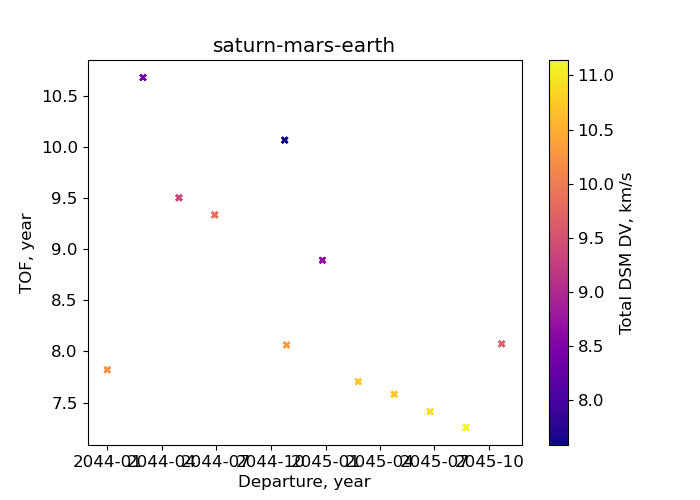

In [12]:
plt.rcParams["font.size"] = 12

fig, ax = plt.subplots(1,1,figsize=(7,5))

im0 = ax.scatter(porkchop_return['t0_matplotlib'], porkchop_return['tof_total']*pk.DAY2YEAR, 
                     c=porkchop_return['dsm_total']/1e3, cmap='plasma', s=15, marker='x')

fig.colorbar(im0, label='Total DSM DV, km/s')
ax.set_title(seq_name)
ax.set(xlabel="Departure, year", ylabel="TOF, year")

plt.show()

In [17]:
plt.savefig("./plots/seq_"+seq_name+".png")

In [14]:
# get number of files
filenames = os.listdir("optim_res")
n_data_already = 0
for filename in filenames:
    if seq_name in filename:
        n_data_already += 1
n_data_already

0

In [15]:
# save result array
np.save("./optim_res/seq_"+seq_name+str(n_data_already+1), x_combined)

In [16]:
x_combined_reloaded = np.load("./optim_res/seq_"+seq_name+".npy")

FileNotFoundError: [Errno 2] No such file or directory: './optim_res/seq_saturn-mars-earth.npy'

In [ ]:
porkchop_return = pxp.porkchop_process(
    prob_list[0], x_combined_reloaded, f_combined, n_leg,
)